# Exploration

## Import

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

import rasterio
from rasterio.plot import show
import cartopy.crs as ccrs # probably needs to be installed with pip...
import pyproj
from shapely.geometry import Point

from toolbox import *

In [2]:
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)


## 1. Load station data

In [3]:
ws = load_weather_station_data('./data/weather_station_list.csv')
ws.head()

,station_id,start_date,end_date,elevation,ycoord,xcoord,name,geometry
0,355,1970-01-01 00:00:00.019470101,1970-01-01 00:00:00.019891031,140,49.6789,8.6276,Bensheim,POINT (8.62760 49.67890)
1,917,1970-01-01 00:00:00.019950801,1970-01-01 00:00:00.020240311,162,49.8809,8.6779,Darmstadt,POINT (8.67790 49.88090)
2,918,1970-01-01 00:00:00.019871001,1970-01-01 00:00:00.019950731,122,49.8453,8.6240,Darmstadt,POINT (8.62400 49.84530)
3,919,1970-01-01 00:00:00.019370203,1970-01-01 00:00:00.019740731,169,49.8697,8.6796,Darmstadt-Botanischer,POINT (8.67960 49.86970)
4,920,1970-01-01 00:00:00.019490101,1970-01-01 00:00:00.019870930,108,49.8564,8.5929,Darmstadt,POINT (8.59290 49.85640)


In [4]:
# Load hillshade DEM
dem, dem_extent = load_dem('./data/dem/bergstraße30_shaded.tif')

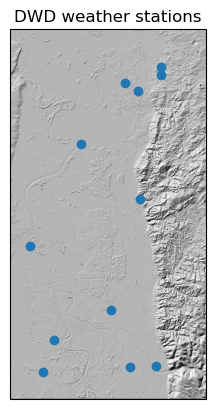

In [8]:
# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(#figsize=(8, 6), 
                       subplot_kw={'projection': ccrs.PlateCarree()} # removes axis labels
                      )

# Plot hillshade DEM
ax.imshow(dem, 
          extent=(dem_extent[0], dem_extent[2], dem_extent[1], dem_extent[3]), 
          cmap='gray', origin='upper', aspect='auto')

ws.plot(ax=ax, label='Weather stations')

if False:
    for index, row in ws.iterrows():
        ax.annotate(row['station_id'], 
                    (row['geometry'].x, row['geometry'].y),
                    fontsize=6)

#ax.legend(loc='lower left', framealpha=0.5)
plt.title('DWD weather stations')

#plt.savefig('./figs/map_weather_stations.png', bbox_inches='tight')
plt.savefig('./figs/map_weather_stations_no_annot.png', bbox_inches='tight')
# Show the plot
plt.show()

In [6]:
gs = load_groundwater_station_data('./data/groundwater/bergstraße/gw_stations_bergstraße.csv')
gs.head()

,station_id,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,geometry
0,12890,458821.0,5505747.0,1969-01-01,2010-08-18,87.44,87.95,15204 days,POINT (8.42892 49.70283)
1,12891,462960.0,5505877.0,1951-01-01,1973-08-01,89.96,90.01,8248 days,POINT (8.48631 49.70426)
2,12892,455982.0,5505917.0,1951-01-01,2024-03-01,89.10,89.40,26723 days,POINT (8.38953 49.70415)
3,12893,461080.0,5505917.0,1951-01-01,1982-06-30,88.17,88.03,11503 days,POINT (8.46023 49.70451)
4,12894,457072.0,5505927.0,1951-01-01,2007-05-01,88.13,88.49,20574 days,POINT (8.40465 49.70432)


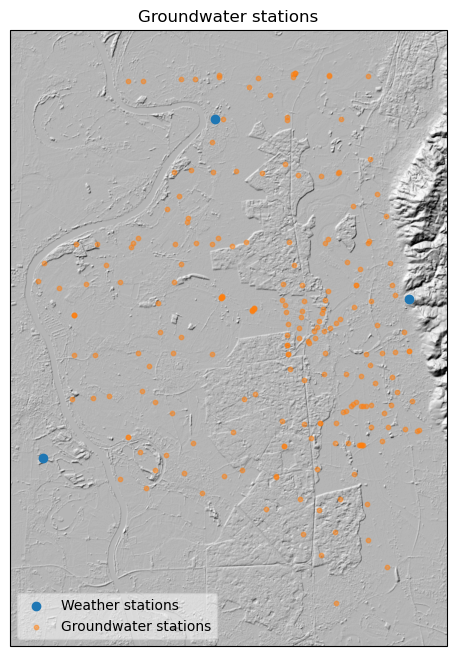

In [7]:
gs_extent = gs.geometry.total_bounds

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 8), 
                       subplot_kw={'projection': ccrs.PlateCarree()} # removes axis labels
                      )

# Plot hillshade DEM
ax.imshow(dem, extent=(dem_extent[0], dem_extent[2],
                       dem_extent[1], dem_extent[3]),
          cmap='gray', origin='upper', aspect='auto')

ws.plot(ax=ax, label='Weather stations')
gs.plot(ax=ax, label='Groundwater stations', alpha=0.5, markersize=10)

if False:
    for index, row in gs.iterrows():
        ax.annotate(row['station_id'], 
                    (row['geometry'].x, row['geometry'].y),
                    fontsize=6)

ax.set_xlim(gs_extent[0]-0.02, gs_extent[2]+0.02)
ax.set_ylim(gs_extent[1]-0.02, gs_extent[3]+0.02)

ax.legend(loc='lower left', framealpha=0.5)
plt.title('Groundwater stations')

#plt.savefig('./figs/map_groundwater_stations.png', bbox_inches='tight')
#plt.savefig('./figs/map_groundwater_stations_no_annot.png', bbox_inches='tight')
# Show the plot
plt.show()

## 2. Load groundwater data

In [8]:
g = load_groundwater_data('./data/groundwater/bergstraße/gw.csv')
g.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557260 entries, 0 to 557259
Data columns (total 6 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   station_id   557260 non-null  int64         
 1   date         557260 non-null  datetime64[ns]
 2   water_dist   554273 non-null  float64       
 3   water_level  554273 non-null  float64       
 4   water_depth  554273 non-null  float64       
 5   water_temp   66890 non-null   float64       
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 25.5 MB


In [9]:
g.describe()

,station_id,date,water_dist,water_level,water_depth,water_temp
count,557260.000000,557260,554273.000000,554273.000000,554273.000000,66890.00000
mean,13589.102144,1995-03-01 05:35:27.078921728,3.594004,89.469690,3.220631,12.27388
min,12890.000000,1912-10-15 00:00:00,0.000000,81.140000,-0.870000,2.02000
25%,13157.000000,1980-08-25 00:00:00,2.500000,86.900000,2.100000,11.30000
50%,13568.000000,1997-12-01 00:00:00,3.360000,89.240000,3.030000,12.00000
75%,13774.000000,2013-08-22 00:00:00,4.400000,92.090000,4.040000,12.90000
max,17794.000000,2024-03-20 00:00:00,11.160000,96.270000,10.790000,21.30000
std,609.112889,NaN,1.527469,3.005891,1.476485,1.55057


In [10]:
g.head()

,station_id,date,water_dist,water_level,water_depth,water_temp
0,13595,1979-01-01,9.48,89.76,8.45,NaN
1,13595,1979-01-08,9.49,89.75,8.46,NaN
2,13595,1979-01-15,9.89,89.35,8.86,NaN
3,13595,1979-01-29,9.98,89.26,8.95,NaN
4,13595,1979-02-05,10.00,89.24,8.97,NaN


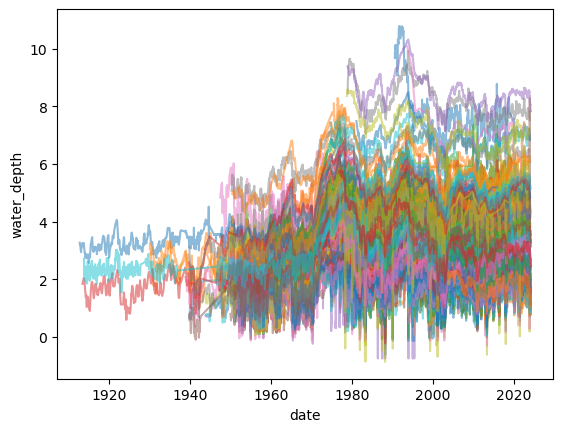

In [11]:
import seaborn as sns
#sns.set_style("white")
#sns.color_palette('tab10')

sns.lineplot(x="date", # plotting not possible with x=g.index
             y="water_depth",
             hue="station_id", 
             #style="event",
             palette='tab10',
             alpha=0.5,
             data=g,#.reset_index(), # reset_index needed to plot with x='date' as normal col
            legend=False
            )

# Set the x-axis limits
#start_date = pd.to_datetime('1950-01-01')
#end_date = pd.to_datetime('1960-01-10')
#plt.xlim(start_date, end_date)

#plt.savefig('./figs/water_depth_all_stations.png', bbox_inches='tight')

# Show the plot
plt.show()


In [12]:
gs.sort_values(by='lifespan', ascending=False).head()

,station_id,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,geometry
10,12901,461760.0,5507216.0,1912-01-01,2024-03-01,90.56,90.48,40968 days,POINT (8.46954 49.71623)
101,13582,463989.0,5496211.0,1913-01-01,2024-03-01,92.91,93.40,40602 days,POINT (8.50147 49.61739)
87,13518,468337.0,5494261.0,1936-01-01,2024-03-01,96.27,96.27,32202 days,POINT (8.56182 49.60009)
36,13030,465599.0,5509535.0,1937-01-01,2024-03-01,90.82,90.92,31836 days,POINT (8.52258 49.73732)
177,13813,468957.0,5503418.0,1940-01-01,2024-03-01,93.31,93.36,30741 days,POINT (8.56967 49.68249)


In [13]:
gs_agg = calc_aggregate_station_data(gs, g)
gs_agg.head()

,station_id,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,geometry,water_level_mean,water_depth_mean,water_temp_mean
0,12890,458821.0,5505747.0,1969-01-01,2010-08-18,87.44,87.95,15204 days,POINT (8.42892 49.70283),85.754006,1.685994,NaN
1,12891,462960.0,5505877.0,1951-01-01,1973-08-01,89.96,90.01,8248 days,POINT (8.48631 49.70426),88.045692,1.914308,NaN
2,12892,455982.0,5505917.0,1951-01-01,2024-03-01,89.10,89.40,26723 days,POINT (8.38953 49.70415),85.506581,3.593419,NaN
3,12893,461080.0,5505917.0,1951-01-01,1982-06-30,88.17,88.03,11503 days,POINT (8.46023 49.70451),86.768671,1.401329,NaN
4,12894,457072.0,5505927.0,1951-01-01,2007-05-01,88.13,88.49,20574 days,POINT (8.40465 49.70432),85.489963,2.640037,NaN


Create aggregate initial values for each station.

In [14]:
gs_agg = calc_initial_station_data(gs_agg, g, 1)
gs_agg.head()

,station_id,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,geometry,water_level_mean,water_depth_mean,water_temp_mean,ini_years_water_depth_mean,ini_years_water_depth_std,ini_years_water_depth_min,ini_years_water_depth_max
0,12890,458821.0,5505747.0,1969-01-01,2010-08-18,87.44,87.95,15204 days,POINT (8.42892 49.70283),85.754006,1.685994,NaN,1.222453,0.520658,0.46,2.03
1,12891,462960.0,5505877.0,1951-01-01,1973-08-01,89.96,90.01,8248 days,POINT (8.48631 49.70426),88.045692,1.914308,NaN,1.755094,0.157512,1.45,1.96
2,12892,455982.0,5505917.0,1951-01-01,2024-03-01,89.10,89.40,26723 days,POINT (8.38953 49.70415),85.506581,3.593419,NaN,3.506000,0.716448,0.85,4.27
3,12893,461080.0,5505917.0,1951-01-01,1982-06-30,88.17,88.03,11503 days,POINT (8.46023 49.70451),86.768671,1.401329,NaN,0.966875,0.128451,0.70,1.21
4,12894,457072.0,5505927.0,1951-01-01,2007-05-01,88.13,88.49,20574 days,POINT (8.40465 49.70432),85.489963,2.640037,NaN,2.358846,0.538384,0.58,3.06


In [15]:
gs_agg.describe()

,station_id,x,y,start_date,end_date,ground_elev,measure_elev,lifespan,water_level_mean,water_depth_mean,water_temp_mean,ini_years_water_depth_mean,ini_years_water_depth_std,ini_years_water_depth_min,ini_years_water_depth_max
count,214.000000,214.000000,2.140000e+02,214,214,214.000000,214.000000,214,213.000000,213.000000,27.000000,211.000000,211.000000,211.000000,211.000000
mean,13695.831776,466120.712121,5.501813e+06,1968-07-19 06:10:05.607476632,2017-04-27 23:19:37.570093568,92.942523,93.362383,17814 days 17:09:31.962616832,89.701578,3.230629,12.138599,3.108367,0.218374,2.645118,3.448436
min,12890.000000,453983.000000,5.487354e+06,1912-01-01 00:00:00,1966-01-01 00:00:00,86.450000,86.500000,134 days 00:00:00,83.935770,0.968683,10.746667,0.634151,0.014618,-0.080000,0.750000
25%,13437.500000,462975.000000,5.497298e+06,1954-04-02 06:00:00,2024-03-01 00:00:00,90.542500,90.860000,15240 days 00:00:00,87.152689,2.175290,11.506146,1.872610,0.120235,1.385000,2.220000
50%,13594.500000,467208.000000,5.501563e+06,1973-12-28 12:00:00,2024-03-01 00:00:00,93.170000,93.435000,17592 days 00:00:00,89.739736,3.024300,11.946996,2.854717,0.175078,2.460000,3.190000
75%,13782.000000,469934.500000,5.505762e+06,1978-01-01 00:00:00,2024-03-01 00:00:00,95.295000,95.760000,23711 days 12:00:00,91.988125,4.023014,12.562876,4.140980,0.258064,3.655000,4.400000
max,17794.000000,473615.000000,5.514651e+06,2013-01-01 00:00:00,2024-03-01 00:00:00,99.920000,100.560000,40968 days 00:00:00,94.533442,8.493808,14.117103,9.955283,0.800611,9.080000,10.740000
std,821.378796,4790.694434,6.067589e+03,NaN,NaN,2.945119,3.001687,6962 days 15:07:51.718233088,2.862547,1.388304,0.869294,1.680509,0.146204,1.757246,1.669913


<Axes: ylabel='Frequency'>

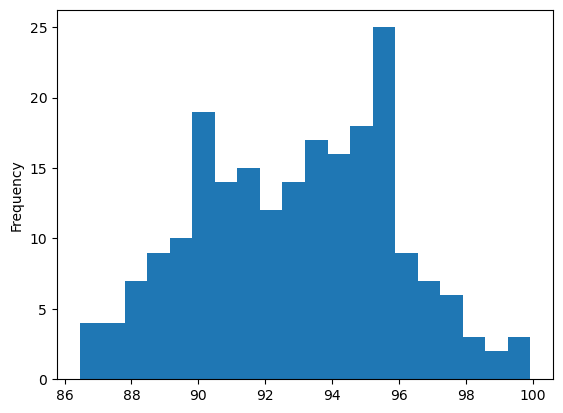

In [16]:
gs_agg['ground_elev'].plot(kind='hist', bins=20)

<Axes: xlabel='ground_elev', ylabel='water_level_mean'>

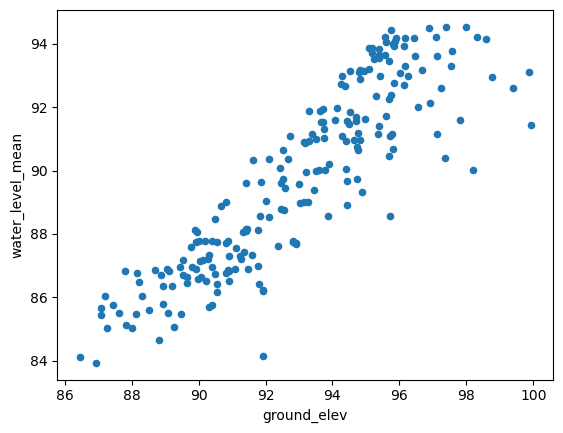

In [17]:
gs_agg.plot(kind='scatter', x='ground_elev', y='water_level_mean')

<Axes: xlabel='ground_elev', ylabel='water_depth_mean'>

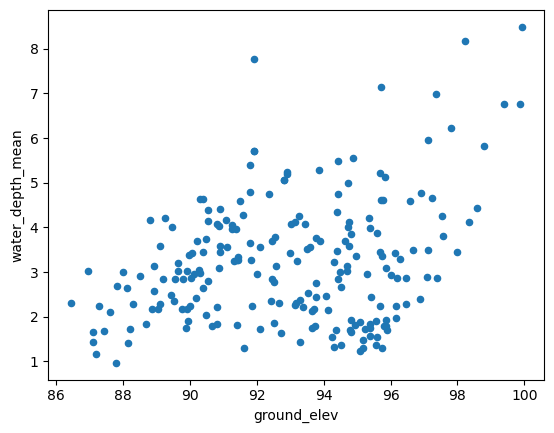

In [18]:
gs_agg.plot(kind='scatter', x='ground_elev', y='water_depth_mean')

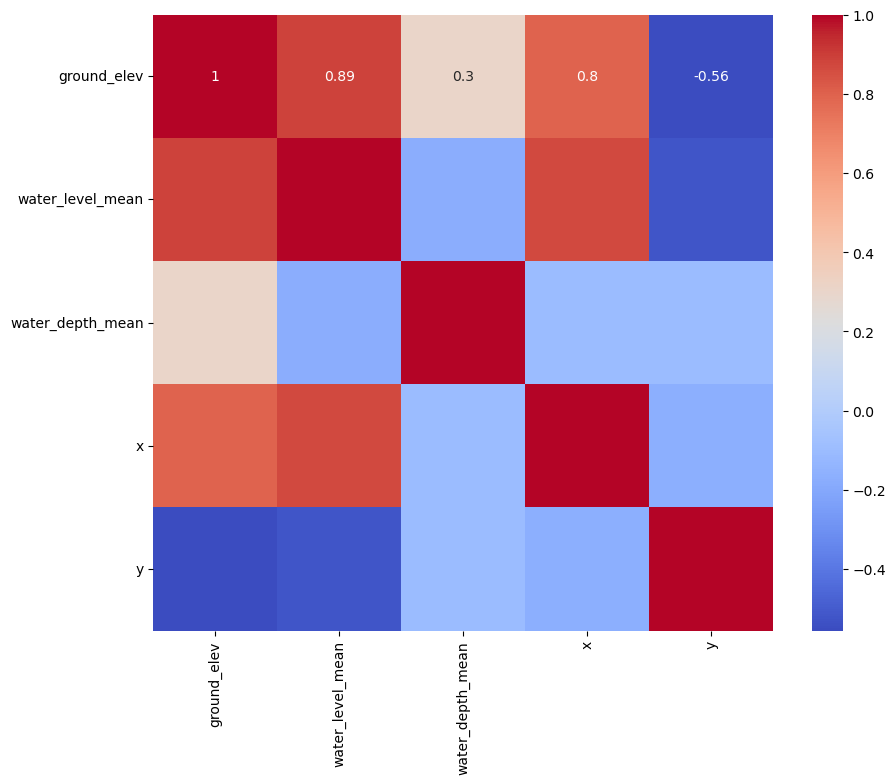

In [19]:
corr_mat = gs_agg[['ground_elev', 'water_level_mean', 'water_depth_mean', 'x', 'y']].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

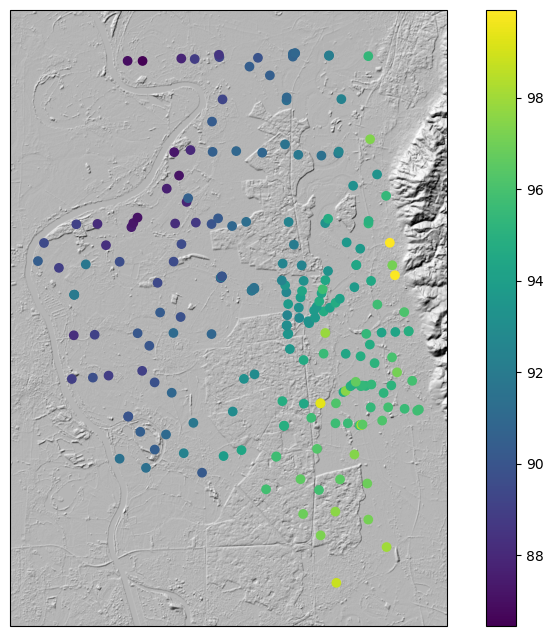

In [20]:
gs_extent = gs.geometry.total_bounds

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 8), 
                       subplot_kw={'projection': ccrs.PlateCarree()} # removes axis labels
                      )

# Plot hillshade DEM
ax.imshow(dem, extent=(dem_extent[0], dem_extent[2],
                       dem_extent[1], dem_extent[3]),
          cmap='gray', origin='upper', aspect='auto')

gs_agg.plot(column='ground_elev',
            #cmap='coolwarm',
            legend=True, 
            ax=ax)

ax.set_xlim(gs_extent[0]-0.02, gs_extent[2]+0.02)
ax.set_ylim(gs_extent[1]-0.02, gs_extent[3]+0.02)

#ax.legend(loc='lower left', framealpha=0.5)

# Show the plot
plt.show()

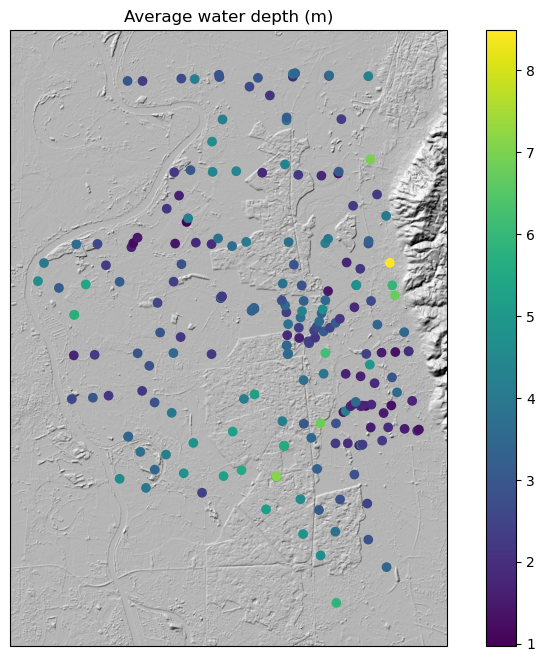

In [21]:
gs_extent = gs.geometry.total_bounds

# Create a figure and axis with a PlateCarree projection
fig, ax = plt.subplots(figsize=(10, 8), 
                       subplot_kw={'projection': ccrs.PlateCarree()} # removes axis labels
                      )

# Plot hillshade DEM
ax.imshow(dem, extent=(dem_extent[0], dem_extent[2],
                       dem_extent[1], dem_extent[3]),
          cmap='gray', origin='upper', aspect='auto')

gs_agg.plot(column='water_depth_mean',
            #cmap='coolwarm',
            legend=True, 
            ax=ax)

ax.set_xlim(gs_extent[0]-0.02, gs_extent[2]+0.02)
ax.set_ylim(gs_extent[1]-0.02, gs_extent[3]+0.02)

#ax.legend(loc='lower left', framealpha=0.5)

plt.title('Average water depth (m)')
plt.savefig('./figs/map_mean_water_depth_all_stations.png', bbox_inches='tight')

# Show the plot
plt.show()

### Check evolution of station number

In [22]:
st = g.copy()
st.index = st['date']

In [26]:
station_count = st.resample('W').count()[['station_id']]
station_count

,station_id
date,
1912-10-20,1
1912-10-27,0
1912-11-03,0
1912-11-10,0
1912-11-17,1
...,...
2024-02-25,146
2024-03-03,142
2024-03-10,136


(-18263.0, 19002.0)

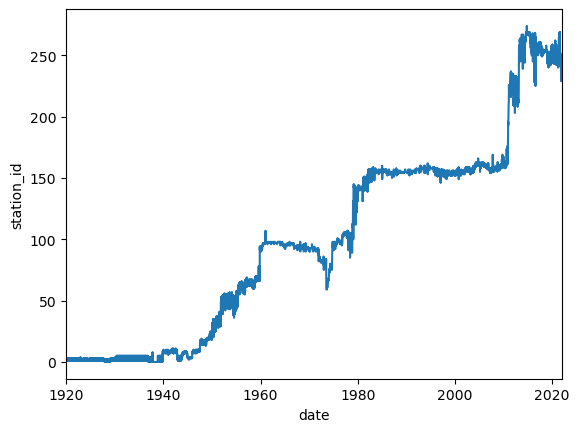

In [29]:
import seaborn as sns
sns.lineplot(x='date', y='station_id', data=station_count)
plt.xlim(pd.to_datetime('1920-01-01'), pd.to_datetime('2022-01-10'))

## 3. Merge groundwater station and measurement data

In [22]:
# perform left join
g_merged = pd.merge(g, gs_agg, how='left')
g_merged.head()

,station_id,date,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,...,measure_elev,lifespan,geometry,water_level_mean,water_depth_mean,water_temp_mean,ini_1_years_water_depth_mean,ini_1_years_water_depth_std,ini_1_years_water_depth_min,ini_1_years_water_depth_max
0,13595,1979-01-01,9.48,89.76,8.45,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,99.24,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65
1,13595,1979-01-08,9.49,89.75,8.46,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,99.24,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65
2,13595,1979-01-15,9.89,89.35,8.86,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,99.24,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65
3,13595,1979-01-29,9.98,89.26,8.95,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,99.24,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65
4,13595,1979-02-05,10.00,89.24,8.97,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,99.24,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65


In [23]:
g_merged['water_depth_anomaly'] = g_merged['water_depth'] - g_merged['ini_1_years_water_depth_mean']

In [24]:
g_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 557260 entries, 0 to 557259
Data columns (total 22 columns):
 #   Column                        Non-Null Count   Dtype          
---  ------                        --------------   -----          
 0   station_id                    557260 non-null  int64          
 1   date                          557260 non-null  datetime64[ns] 
 2   water_dist                    554273 non-null  float64        
 3   water_level                   554273 non-null  float64        
 4   water_depth                   554273 non-null  float64        
 5   water_temp                    66890 non-null   float64        
 6   x                             557260 non-null  float64        
 7   y                             557260 non-null  float64        
 8   start_date                    557260 non-null  datetime64[ns] 
 9   end_date                      557260 non-null  datetime64[ns] 
 10  ground_elev                   557260 non-null  float64        
 11  

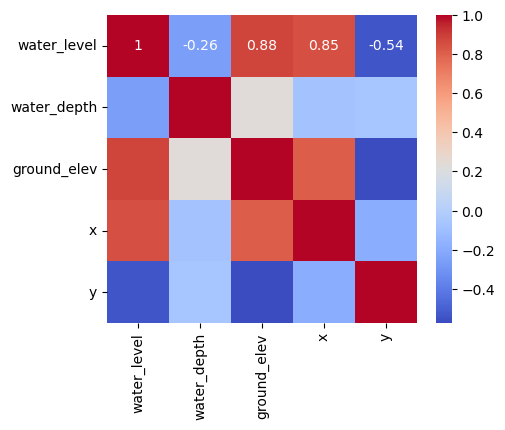

In [25]:
corr_mat = g_merged[['water_level', 'water_depth', 'ground_elev', 'x', 'y']].corr()

plt.figure(figsize=(5, 4))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()


In [26]:
#date_diffs = g_merged.index.to_series().diff()
date_diffs = g_merged.date.diff()
date_diffs.value_counts()

date
7 days         456078
1 days          91622
14 days          2440
6 days           1442
8 days           1274
                ...  
-728 days           1
-18417 days         1
44 days             1
-26896 days         1
1258 days           1
Name: count, Length: 364, dtype: int64

## 4. Load regional weather data

Reminder: Weather data ends with the year 2022!

In [27]:
w = load_weather_data('./data/weather_collections/weather_daily_region.csv')
w.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 53357 entries, 1876-01-01 to 2022-12-31
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   station_id_count          53357 non-null  int64  
 1   precip_mean               53356 non-null  float64
 2   precip_min                53356 non-null  float64
 3   precip_max                53356 non-null  float64
 4   precip_std                28854 non-null  float64
 5   tmean_mean                53357 non-null  float64
 6   tmean_min                 53357 non-null  float64
 7   tmean_max                 53357 non-null  float64
 8   tmean_std                 28855 non-null  float64
 9   tmax_mean                 53357 non-null  float64
 10  tmax_min                  53357 non-null  float64
 11  tmax_max                  53357 non-null  float64
 12  tmax_std                  28855 non-null  float64
 13  tmin_mean                 53357 non-null  fl

There is a large data gap in the year 1945...

In [28]:
date_diffs = w.index.to_series().diff()
print(date_diffs.value_counts())
print(date_diffs[date_diffs != pd.Timedelta(days=1)])

date
1 days      53355
335 days        1
Name: count, dtype: int64
date
1876-01-01        NaT
1945-10-01   335 days
Name: date, dtype: timedelta64[ns]


## 5. Test merge weather and groundwater

<Axes: xlabel='date', ylabel='water_depth'>

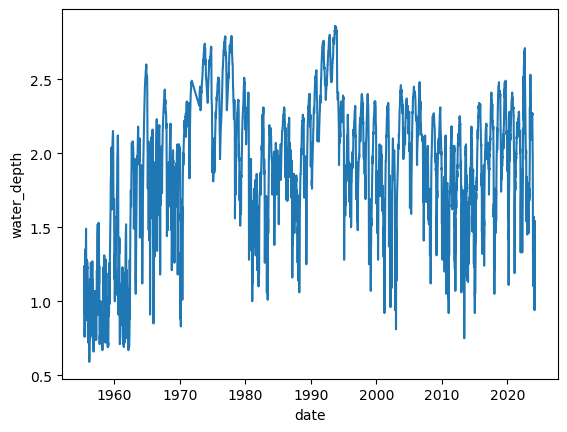

In [33]:
g_filtered = g.loc[g.station_id == 13589]

sns.lineplot(x="date", y="water_depth",
             #hue="station_id", 
             #style="event",
             #palette='tab10',
             data=g_filtered)

In [34]:
g_filtered.index.min()

44727

In [35]:
date_diffs = g_filtered.index.to_series().diff()
date_diffs.value_counts()

1.0    7522
Name: count, dtype: int64

In [36]:
m = pd.merge(g_filtered, w,
             how='left', left_index=True, right_index=True)
m.head()

,station_id,date,water_dist,water_level,water_depth,water_temp,station_id_count,precip_mean,precip_min,precip_max,...,tmin_max,tmin_std,moisture_mean,moisture_min,moisture_max,moisture_std,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean
44727,13589,1955-05-18,0.71,94.91,0.94,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44728,13589,1955-05-23,0.79,94.83,1.02,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44729,13589,1955-05-30,0.69,94.93,0.92,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44730,13589,1955-06-06,1.01,94.61,1.24,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
44731,13589,1955-06-13,0.53,95.09,0.76,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
m.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7523 entries, 44727 to 52249
Data columns (total 31 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   station_id                7523 non-null   int64         
 1   date                      7523 non-null   datetime64[ns]
 2   water_dist                7497 non-null   float64       
 3   water_level               7497 non-null   float64       
 4   water_depth               7497 non-null   float64       
 5   water_temp                3031 non-null   float64       
 6   station_id_count          0 non-null      float64       
 7   precip_mean               0 non-null      float64       
 8   precip_min                0 non-null      float64       
 9   precip_max                0 non-null      float64       
 10  precip_std                0 non-null      float64       
 11  tmean_mean                0 non-null      float64       
 12  tmean_min           

In [38]:
m.describe()

,station_id,date,water_dist,water_level,water_depth,water_temp,station_id_count,precip_mean,precip_min,precip_max,...,tmin_max,tmin_std,moisture_mean,moisture_min,moisture_max,moisture_std,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean
count,7523.0,7523,7497.000000,7497.000000,7497.000000,3031.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
mean,13589.0,2004-10-08 22:34:03.333776256,2.451602,93.927017,1.922983,13.125922,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,13589.0,1955-05-18 00:00:00,0.360000,92.990000,0.590000,10.800000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,13589.0,1992-07-23 12:00:00,2.200000,93.640000,1.680000,12.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,13589.0,2013-10-27 00:00:00,2.540000,93.870000,1.980000,12.900000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,13589.0,2019-01-14 12:00:00,2.850000,94.170000,2.210000,14.300000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
max,13589.0,2024-03-20 00:00:00,3.470000,95.260000,2.860000,15.600000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,0.0,NaN,0.559812,0.396845,0.396845,1.281060,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


/tmp/ipykernel_27499/1011745856.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(x="date", y="water_depth",


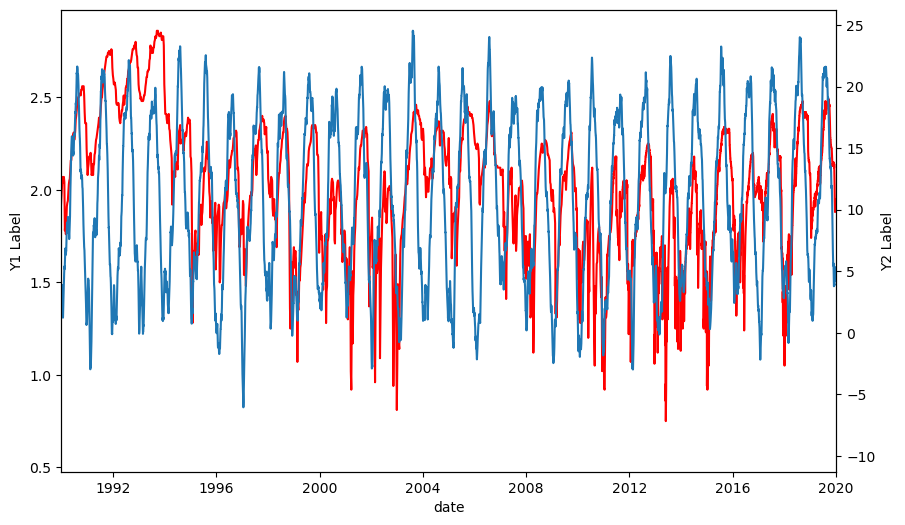

In [39]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first DataFrame on the primary y-axis
sns.lineplot(x="date", y="water_depth",
             #hue="station_id", 
             #style="event",
             palette='tab10',
             color='r',
             data=g_filtered,
             ax=ax)

# Create a secondary y-axis
ax2 = ax.twinx()

# Plot the second DataFrame on the secondary y-axis
sns.lineplot(x="date", y="tmean_mean_prev_30d_mean", 
             data=w,#['1983-01':'1985-01'], # filter dates here
             ax=ax2, 
             #color='r'
            )

# Optionally, set labels for the y-axes
ax.set_ylabel('Y1 Label')
ax2.set_ylabel('Y2 Label')

# Set the x-axis limits
start_date = pd.to_datetime('1990-01-01')
end_date = pd.to_datetime('2020-01-10')
plt.xlim(start_date, end_date)

# Show the plot
plt.show()

### 5.1 Lag correction

In [40]:
w['tmean_mean_prev_30d_mean']

date
1876-01-01         NaN
1876-01-02         NaN
1876-01-03         NaN
1876-01-04         NaN
1876-01-05         NaN
                ...   
2022-12-27    2.600833
2022-12-28    2.640833
2022-12-29    2.747500
2022-12-30    2.785000
2022-12-31    3.178333
Name: tmean_mean_prev_30d_mean, Length: 53357, dtype: float64

In [41]:
g_filtered['water_depth']

44727    0.94
44728    1.02
44729    0.92
44730    1.24
44731    0.76
         ... 
52245    1.48
52246    1.51
52247    1.50
52248    1.52
52249    1.54
Name: water_depth, Length: 7523, dtype: float64

Find optimal lag correction in N days from the max correlation between temperature and water_depth (=seasonality).
Then shift water_depth by -N days. Since this shift is applied to a numerical index and not to a date index, it will lead to errors where the original timestep between rows is not one day.
May be improved in the future...

In [42]:
# Calculate cross-correlation for different lag values
max_lag = 30  # Maximum lag to consider (adjust as needed)
lags = np.arange(0, max_lag + 1)
correlations = [w['tmean_mean_prev_30d_mean'].corr(g_filtered['water_depth']
                                                   .shift(-lag)) for lag in lags]
print(max(correlations), correlations)

# Find lag with highest correlation
optimal_lag = lags[np.argmax(correlations)]

# Calculate lagged groundwater levels
g_filtered_lagged = g_filtered.shift(-optimal_lag)

# Calculate average lag time
average_lag_time = np.mean(optimal_lag)
print("Average lag time:", average_lag_time)

nan [nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan]
Average lag time: 0.0


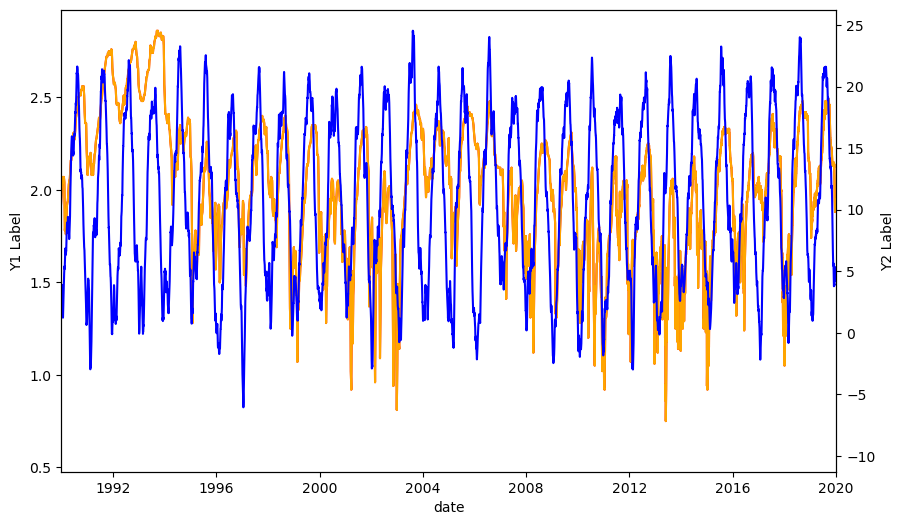

In [43]:
# Create a figure and an axis
fig, ax = plt.subplots(figsize=(10, 6))

# Plot the first DataFrame on the primary y-axis
sns.lineplot(x="date", y="water_depth",
             #hue="station_id", 
             #style="event",
             #palette='tab10',
             color='r',
             data=g_filtered,
             ax=ax)

# Plot the first DataFrame on the primary y-axis
sns.lineplot(x="date", y="water_depth",
             #hue="station_id", 
             #style="event",
             #palette='tab10',
             color='orange',
             data=g_filtered_lagged,
             ax=ax)

# Create a secondary y-axis
ax2 = ax.twinx()

# Plot the second DataFrame on the secondary y-axis
sns.lineplot(x="date", y="tmean_mean_prev_30d_mean", 
             data=w,#['1983-01':'1985-01'], # filter dates here
             ax=ax2, 
             color='b'
            )

# Optionally, set labels for the y-axes
ax.set_ylabel('Y1 Label')
ax2.set_ylabel('Y2 Label')

# Set the x-axis limits
#start_date = pd.to_datetime('1970-01-01')
#end_date = pd.to_datetime('1985-01-10')
plt.xlim(start_date, end_date)

# Show the plot
plt.show()

## 6. Merge weather and groundwater

In [44]:
g_merged.index = g_merged['date']
g_merged.head()

,station_id,date,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,...,lifespan,geometry,water_level_mean,water_depth_mean,water_temp_mean,1st_year_water_depth_mean,1st_year_water_depth_std,1st_year_water_depth_min,1st_year_water_depth_max,water_depth_anomaly
date,,,,,,,,,,,,,,,,,,,,,
1979-01-01,13595,1979-01-01,9.48,89.76,8.45,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65,-0.9475
1979-01-08,13595,1979-01-08,9.49,89.75,8.46,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65,-0.9375
1979-01-15,13595,1979-01-15,9.89,89.35,8.86,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65,-0.5375
1979-01-29,13595,1979-01-29,9.98,89.26,8.95,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65,-0.4475
1979-02-05,13595,1979-02-05,10.00,89.24,8.97,NaN,468527.0,5496600.0,1978-01-01,2024-03-01,...,16861 days,POINT (8.56426 49.62114),90.031838,8.178162,NaN,9.3975,0.25816,8.45,9.65,-0.4275


In [45]:
w.head()

,station_id_count,precip_mean,precip_min,precip_max,precip_std,tmean_mean,tmean_min,tmean_max,tmean_std,tmax_mean,...,tmin_max,tmin_std,moisture_mean,moisture_min,moisture_max,moisture_std,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean
date,,,,,,,,,,,,,,,,,,,,,
1876-01-01,1,1.8,1.8,1.8,NaN,-0.2,-0.2,-0.2,NaN,2.0,...,-1.0,NaN,88.0,88.0,88.0,NaN,NaN,NaN,NaN,NaN
1876-01-02,1,20.6,20.6,20.6,NaN,2.8,2.8,2.8,NaN,3.2,...,-1.5,NaN,96.0,96.0,96.0,NaN,NaN,NaN,NaN,NaN
1876-01-03,1,7.6,7.6,7.6,NaN,6.0,6.0,6.0,NaN,8.0,...,3.0,NaN,95.0,95.0,95.0,NaN,NaN,NaN,NaN,NaN
1876-01-04,1,1.0,1.0,1.0,NaN,-1.9,-1.9,-1.9,NaN,8.0,...,-6.0,NaN,91.0,91.0,91.0,NaN,NaN,NaN,NaN,NaN
1876-01-05,1,1.0,1.0,1.0,NaN,-6.2,-6.2,-6.2,NaN,-3.0,...,-9.0,NaN,82.0,82.0,82.0,NaN,NaN,NaN,NaN,NaN


In [46]:
m = pd.merge(g_merged, w,
             how='left', left_index=True, right_index=True)
m

,station_id,date,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,...,tmin_max,tmin_std,moisture_mean,moisture_min,moisture_max,moisture_std,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean
date,,,,,,,,,,,,,,,,,,,,,
1912-10-15,12901,1912-10-15,0.00,87.29,3.27,NaN,461760.000,5507216.000,1912-01-01,2024-03-01,...,3.3,NaN,97.0,97.0,97.0,NaN,2.5,15.9,6.642857,8.110000
1912-11-15,12901,1912-11-15,0.00,87.39,3.17,NaN,461760.000,5507216.000,1912-01-01,2024-03-01,...,0.5,NaN,75.0,75.0,75.0,NaN,19.0,78.5,5.671429,6.830000
1912-12-15,12901,1912-12-15,0.00,87.41,3.15,NaN,461760.000,5507216.000,1912-01-01,2024-03-01,...,8.6,NaN,88.0,88.0,88.0,NaN,8.0,36.5,4.371429,2.830000
1913-01-15,12901,1913-01-15,0.00,87.55,3.01,NaN,461760.000,5507216.000,1912-01-01,2024-03-01,...,-2.9,NaN,74.0,74.0,74.0,NaN,18.7,51.8,-0.157143,2.813333
1913-02-15,12901,1913-02-15,0.00,87.62,2.94,NaN,461760.000,5507216.000,1912-01-01,2024-03-01,...,-2.4,NaN,67.0,67.0,67.0,NaN,0.3,60.9,4.157143,4.983333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-03-20,13488,2024-03-20,4.06,87.63,3.48,12.5,460950.315,5500278.990,1951-01-01,1992-06-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-20,13832,2024-03-20,2.20,92.01,1.70,NaN,470626.000,5504557.000,1981-01-01,2024-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2024-03-20,13836,2024-03-20,8.24,92.09,7.83,NaN,472156.000,5504857.000,1978-01-01,2024-03-01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
# restrict data to the post-war period
m = m.loc[m.date > pd.to_datetime('1950-01-01')]

# drop all rows with a date after the weather data cutoff date
m = m.loc[m.date <= pd.to_datetime('2022-12-31')]

In [48]:
m = m.dropna(subset=['station_id_count'])

In [49]:
m['week_of_year'] = m['date'].dt.isocalendar().week

In [50]:
m.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 535080 entries, 1950-01-02 to 2022-12-31
Data columns (total 48 columns):
 #   Column                     Non-Null Count   Dtype          
---  ------                     --------------   -----          
 0   station_id                 535080 non-null  int64          
 1   date                       535080 non-null  datetime64[ns] 
 2   water_dist                 532286 non-null  float64        
 3   water_level                532286 non-null  float64        
 4   water_depth                532286 non-null  float64        
 5   water_temp                 58281 non-null   float64        
 6   x                          535080 non-null  float64        
 7   y                          535080 non-null  float64        
 8   start_date                 535080 non-null  datetime64[ns] 
 9   end_date                   535080 non-null  datetime64[ns] 
 10  ground_elev                535080 non-null  float64        
 11  measure_elev           

In [51]:
m.describe()

,station_id,date,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,...,tmin_std,moisture_mean,moisture_min,moisture_max,moisture_std,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean,week_of_year
count,535080.000000,535080,532286.000000,532286.000000,532286.000000,58281.000000,535080.000000,5.350800e+05,535080,535080,...,535080.000000,535080.000000,535080.000000,535080.000000,535080.000000,535080.000000,535080.000000,535080.000000,535080.000000,535080.0
mean,13584.383032,1995-01-26 12:10:28.768782208,3.605169,89.464313,3.229522,12.234722,465762.831671,5.501887e+06,1967-01-27 18:55:06.768333728,2017-11-06 20:27:37.017267712,...,1.414350,75.588099,69.390480,82.318911,5.245498,13.079499,56.048417,10.443488,10.444661,26.661774
min,12890.000000,1950-01-02 00:00:00,0.000000,81.140000,-0.870000,2.020000,453983.000000,5.487354e+06,1912-01-01 00:00:00,1966-01-01 00:00:00,...,0.050000,32.250000,25.290000,35.250000,0.000000,0.000000,0.325000,-11.031746,-8.513333,1.0
25%,13159.000000,1980-11-03 00:00:00,2.500000,86.900000,2.110000,11.300000,461900.003000,5.497120e+06,1953-01-01 00:00:00,2024-03-01 00:00:00,...,1.033948,66.714286,60.000000,73.000000,3.656045,2.975000,33.757143,4.785714,4.592000,14.0
50%,13564.000000,1997-05-26 00:00:00,3.370000,89.240000,3.040000,12.000000,466857.965000,5.501538e+06,1973-01-01 00:00:00,2024-03-01 00:00:00,...,1.345296,77.714286,71.000000,85.000000,4.979960,9.500000,51.760000,10.403571,10.344762,27.0
75%,13773.000000,2012-11-19 00:00:00,4.410000,92.100000,4.070000,12.800000,469937.000000,5.505957e+06,1978-01-01 00:00:00,2024-03-01 00:00:00,...,1.687207,85.750000,79.000000,93.000000,6.601767,19.200000,73.871429,16.451020,16.551667,40.0
max,17794.000000,2022-12-31 00:00:00,11.160000,96.270000,10.790000,21.300000,473615.000000,5.514651e+06,2013-01-01 00:00:00,2024-03-01 00:00:00,...,6.619919,99.500000,99.000000,100.000000,22.487033,122.671429,214.471429,28.671429,24.437778,53.0
std,599.613919,NaN,1.521245,2.998210,1.477947,1.549757,4850.075874,6.171791e+03,NaN,NaN,...,0.592267,12.663719,13.056577,12.877276,2.275008,12.889888,30.296119,7.094874,6.682626,15.052767


<Axes: xlabel='date', ylabel='water_depth'>

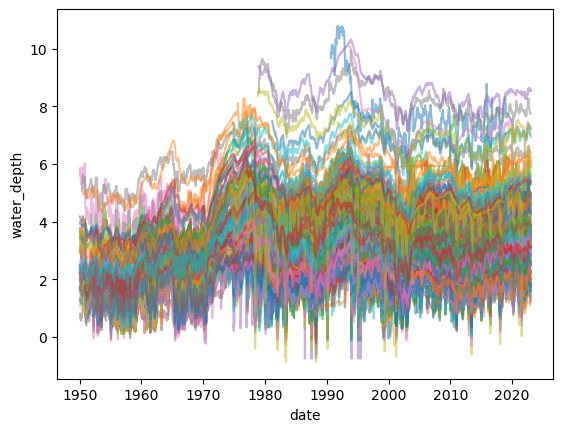

In [52]:
sns.lineplot(x="date", # plotting not possible with x=g.index
             y="water_depth",
             hue="station_id", 
             #style="event",
             palette='tab10',
             alpha=0.5,
             data=m.reset_index(drop=True), # reset_index needed to plot with x='date' as normal col
            legend=False
            )

In [53]:
meteoric_factors = ['water_depth', 'week_of_year',
                    'precip_mean_prev_7d_sum', 'precip_mean_prev_30d_sum',
                    'tmean_mean_prev_7d_mean', 'tmean_mean_prev_30d_mean']

spatial_factors = ['water_depth', 'ground_elev', 'x', 'y']

In [54]:
corr_mat = m[meteoric_factors].corr()
corr_mat

,water_depth,week_of_year,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean
water_depth,1.000000,0.051369,-0.021519,-0.054548,0.005026,0.018253
week_of_year,0.051369,1.000000,0.045910,0.040771,0.234642,0.375275
precip_mean_prev_7d_sum,-0.021519,0.045910,1.000000,0.520929,0.044734,0.049344
precip_mean_prev_30d_sum,-0.054548,0.040771,0.520929,1.000000,0.045287,0.067052
tmean_mean_prev_7d_mean,0.005026,0.234642,0.044734,0.045287,1.000000,0.926137
tmean_mean_prev_30d_mean,0.018253,0.375275,0.049344,0.067052,0.926137,1.000000


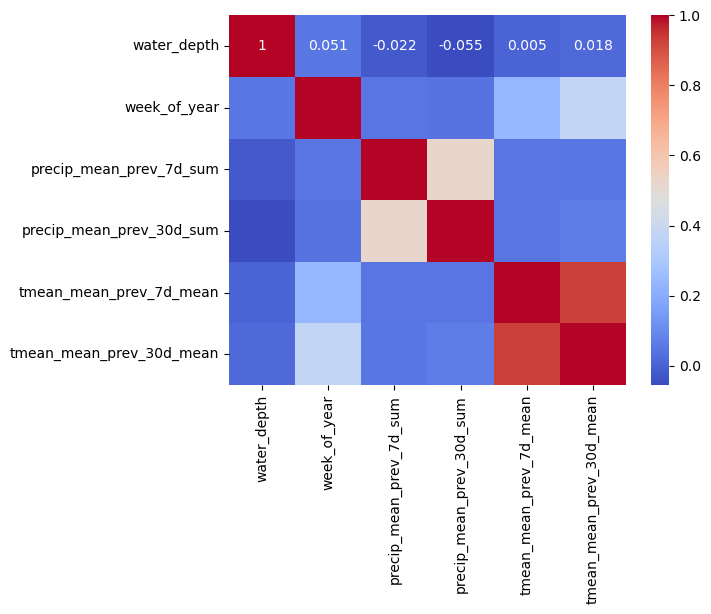

In [55]:
plt.figure()#figsize=(5, 4))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

In [56]:
m_plot = m[meteoric_factors].reset_index()
m_plot
#plots = sns.pairplot(m_plot)

,date,water_depth,week_of_year,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean
0,1950-01-02,1.59,1,7.525,57.825,2.825000,4.077500
1,1950-01-02,2.40,1,7.525,57.825,2.825000,4.077500
2,1950-01-02,2.12,1,7.525,57.825,2.825000,4.077500
3,1950-01-02,1.28,1,7.525,57.825,2.825000,4.077500
4,1950-01-02,3.97,1,7.525,57.825,2.825000,4.077500
...,...,...,...,...,...,...,...
535075,2022-12-31,2.00,52,13.575,44.650,8.939286,3.178333
535076,2022-12-31,8.54,52,13.575,44.650,8.939286,3.178333
535077,2022-12-31,3.58,52,13.575,44.650,8.939286,3.178333
535078,2022-12-31,4.60,52,13.575,44.650,8.939286,3.178333


In [57]:
corr_mat = m[spatial_factors].corr()
corr_mat

,water_depth,ground_elev,x,y
water_depth,1.000000,0.234483,-0.081386,-0.062420
ground_elev,0.234483,1.000000,0.813802,-0.571050
x,-0.081386,0.813802,1.000000,-0.189107
y,-0.062420,-0.571050,-0.189107,1.000000


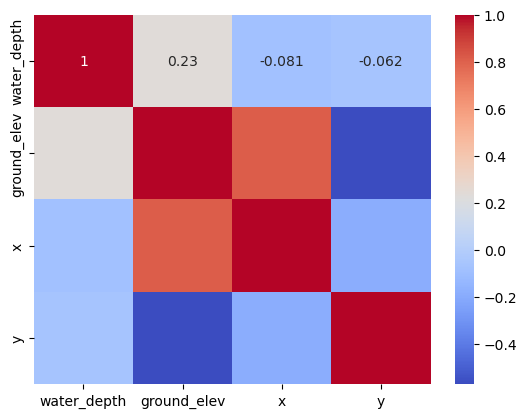

In [58]:
plt.figure()#figsize=(5, 4))
sns.heatmap(corr_mat, annot=True, cmap='coolwarm')
plt.show()

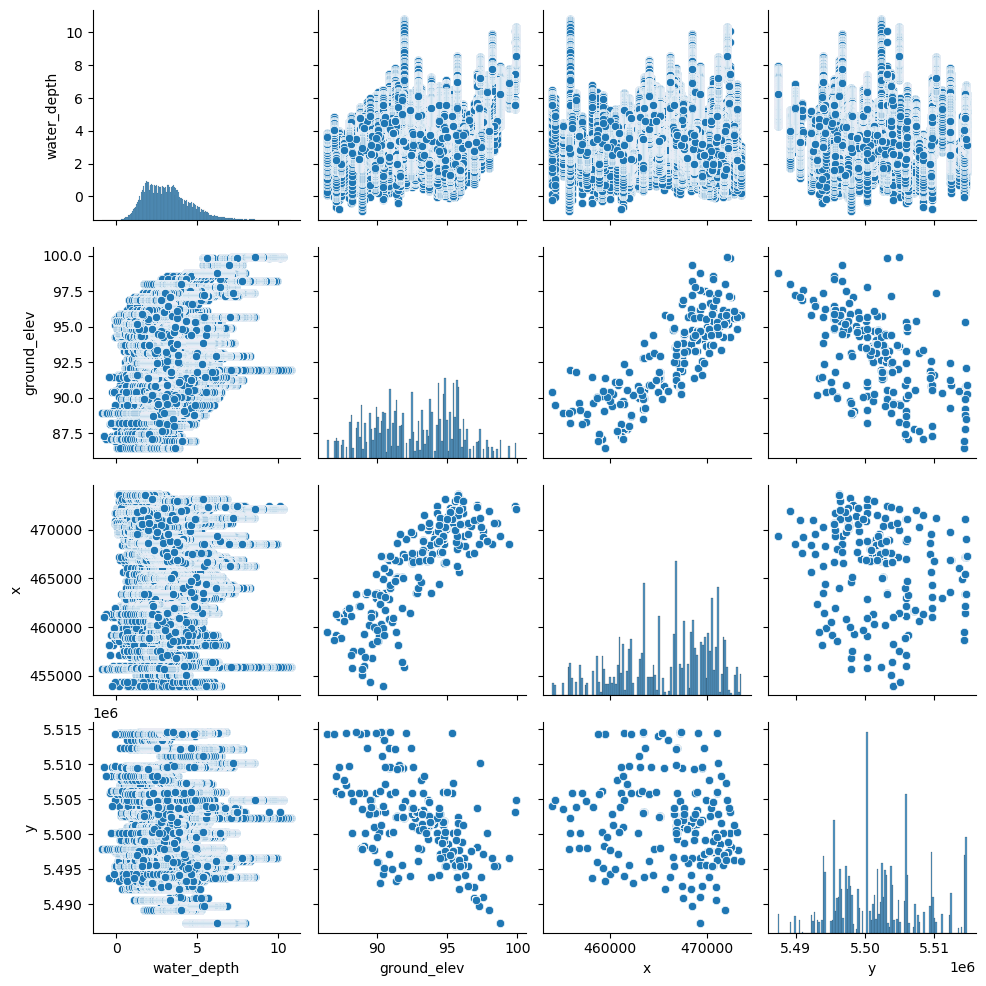

In [59]:
m_plot = m[spatial_factors].reset_index()
m_plot
plots = sns.pairplot(m_plot)

<Axes: xlabel='date', ylabel='water_depth_anomaly'>

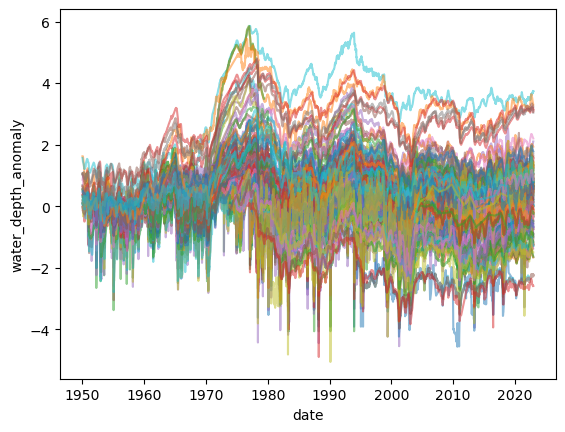

In [60]:
sns.lineplot(x="date", # plotting not possible with x=g.index
             y="water_depth_anomaly",
             hue="station_id", 
             #style="event",
             palette='tab10',
             alpha=0.5,
             data=m.reset_index(drop=True), # reset_index needed to plot with x='date' as normal col
            legend=False
            )

### 6.1 Lag correction

Find optimal lag correction in N days from the max correlation between temperature and water_depth (=seasonality).
Then shift water_depth by -N days. Since this shift is applied to a numerical index and not to a date index, it will lead to errors where the original timestep between rows is not one week.
Strategy to improve this in the future: Identify the ideal shift in days, than merge the shifted data back with the entire daily weather data. This ensures that each shifted depth row will have all the necessary weather data (instead many nans).

In [61]:
def shift_by_lag(df):
    # get first two years of data
    start_date = df['date'].min()
    end_date = df['date'].min() + pd.to_timedelta('1200D')
    df = df.loc[start_date:end_date]
    
    # get separate dfs for temp and depth
    temp = df['tmean_mean_prev_30d_mean']
    depth = df['water_depth']

    # Calculate cross-correlation for different lag values
    max_lag = 12  # Maximum lag to consider (adjust as needed)
    lags = np.arange(0, max_lag + 1)
    correlations = [temp.corr(depth.shift(-lag#, freq="D"
                                         )) for lag in lags]
    
    # Find lag with highest correlation
    optimal_lag = lags[np.argmax(correlations)]

    #print(max(correlations), optimal_lag, correlations)

    # Calculate lagged groundwater levels
    depth_shifted = pd.DataFrame(depth.shift(-optimal_lag#, freq="D"
                                             ).rename('water_depth_shifted',
                                                      inplace=True))

    # calculate lag timedelta and store in column
    depth_shifted['shift_days'] = depth.index[optimal_lag] - depth.index[0]
    
    # merge depth_shifted with old df
    df_shifted = df.merge(right=depth_shifted, how='left',
                          left_index=True, right_on='date')
    return df_shifted


def plot_shifted(df):
    fig, ax = plt.subplots(figsize=(8, 4))
    
    sns.lineplot(x='date', y='water_depth',
                 color='green', data=df,
                 ax=ax)
    
    sns.lineplot(x='date', y='water_depth_shifted',
                 color='blue', data=df,
                 ax=ax)
    
    ax2 = ax.twinx()
    
    sns.lineplot(x='date', y='tmean_mean_prev_30d_mean',
                 data=df, ax=ax2, 
                 color='red') 

#def plot_corr(df):

In [62]:
m.station_id.unique()

array([13491, 13492, 13518, 12896, 14082, 14173, 14176, 14166, 12942,
       13813, 12900, 12901, 12902, 12949, 13030, 13582, 13658, 13032,
       12911, 13141, 13157, 13023, 12923, 12925, 12926, 12907, 12908,
       12909, 13111, 13025, 13159, 13162, 13729, 14119, 13161, 13105,
       13149, 12944, 13490, 12893, 12895, 13726, 13489, 12947, 12892,
       12894, 13735, 12891, 12945, 13805, 13723, 13487, 13488, 13485,
       14158, 12922, 13838, 13698, 13625, 13627, 13635, 13581, 13656,
       13584, 13586, 13588, 13589, 13727, 13731, 13674, 13773, 13776,
       13779, 13794, 13803, 13784, 13757, 13761, 13822, 13751, 13774,
       13767, 13748, 13778, 13783, 13790, 13795, 13806, 13785, 13756,
       13765, 13766, 13769, 13771, 13825, 13612, 13689, 13042, 13601,
       13508, 12950, 12890, 12924, 12898, 15892, 13164, 13432, 13479,
       13434, 12927, 13557, 13506, 13510, 14080, 13473, 13475, 14077,
       14160, 14169, 13801, 13695, 13498, 13509, 12899, 13594, 13703,
       13704, 13764,

In [63]:
df_list = []

for id in m.station_id.unique():
#for id in [13630]:
    #print(id)
    df = m.loc[m.station_id == id]
    df_shifted = shift_by_lag(df)
    plot_shifted(df_shifted)
    df_list.append(df_shifted)

m_shifted = pd.concat(df_list)

/home/philip/anaconda3/envs/geo/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/philip/anaconda3/envs/geo/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/philip/anaconda3/envs/geo/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: invalid value encountered in multiply
  c *= np.true_divide(1, fact)
/home/philip/anaconda3/envs/geo/lib/python3.9/site-packages/numpy/lib/function_base.py:2889: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/philip/anaconda3/envs/geo/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning: divide by zero encountered in divide
  c *= np.true_divide(1, fact)
/home/philip/anaconda3/envs/geo/lib/python3.9/site-packages/numpy/lib/function_base.py:2748: RuntimeWarning:

In [95]:
m_shifted.describe()

,station_id,date,water_dist,water_level,water_depth,water_temp,x,y,start_date,end_date,...,moisture_max,moisture_std,precip_mean_prev_7d_sum,precip_mean_prev_30d_sum,tmean_mean_prev_7d_mean,tmean_mean_prev_30d_mean,week_of_year,shifted_water_depth,water_depth_shifted,shift_days
count,33249.000000,33249,33197.000000,33197.000000,33197.000000,0.0,33249.000000,3.324900e+04,33249,33249,...,33249.000000,31832.000000,33248.000000,33244.000000,33249.000000,33249.000000,33249.0,4533.000000,31748.000000,33249
mean,13694.598845,1970-10-14 02:23:55.062708664,3.350621,90.014810,3.069148,NaN,466264.216662,5.501347e+06,1969-09-16 21:43:50.082107708,2018-06-12 07:33:34.869620224,...,82.944137,5.046374,13.692949,58.509130,9.788924,9.797652,26.481398,2.726217,3.056716,64 days 08:28:35.059099522
min,12890.000000,1912-10-15 00:00:00,0.000000,81.140000,-0.100000,NaN,453983.000000,5.487354e+06,1912-01-01 00:00:00,1966-01-01 00:00:00,...,36.000000,0.447214,0.000000,0.325000,-12.557143,-8.513333,1.0,1.970000,-0.100000,0 days 00:00:00
25%,13473.000000,1957-06-24 00:00:00,2.100000,87.230000,1.880000,NaN,463039.549000,5.496610e+06,1955-01-01 00:00:00,2024-03-01 00:00:00,...,75.000000,3.690399,3.137143,34.314286,4.288095,4.144286,13.0,2.570000,1.860000,35 days 00:00:00
50%,13601.000000,1975-06-09 00:00:00,3.030000,90.480000,2.750000,NaN,467598.000000,5.501281e+06,1974-01-01 00:00:00,2024-03-01 00:00:00,...,85.000000,4.802777,10.242857,53.614286,9.357143,9.485000,26.0,2.740000,2.730000,63 days 00:00:00
75%,13783.000000,1980-11-17 00:00:00,4.310000,92.800000,4.020000,NaN,470207.000000,5.504827e+06,1978-01-01 00:00:00,2024-03-01 00:00:00,...,93.000000,6.160550,19.828571,77.671429,15.948980,16.179048,40.0,2.970000,4.000000,84 days 00:00:00
max,17794.000000,2022-12-26 00:00:00,11.160000,95.950000,10.790000,NaN,473615.000000,5.514651e+06,2013-01-01 00:00:00,2024-03-01 00:00:00,...,100.000000,22.487033,95.500000,210.500000,28.300000,24.400000,53.0,3.190000,10.790000,1092 days 00:00:00
std,732.292800,NaN,1.790052,3.134509,1.697470,NaN,4866.531794,5.915439e+03,NaN,NaN,...,11.866307,1.920534,13.331871,32.024412,7.064221,6.632244,15.290713,0.298969,1.702632,55 days 12:33:53.156594961


## Idea for modeling strategy

1. split in test, train and deployment data
2. Model for groundwater signal lag: for each training station, calculate the actual lag times. then try to train a model for the lag times based on groundwater depth, location?, ...
3. use predicted lag to shift gw train data to be in phase with precip data
4. train model to predict the magnitude of shifted gw level fluctuation based on weather (mainly precip?)
5. predict the lag of gw level test data, shift and then predict magnitude; back-shift and compare with true values --> asses model performance (good metrics?)

## Exploratory PCA